In [1]:
import json
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In C:\Users\zande\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\zande\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\zande\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\zande\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\zande\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

## OG Response Times

In [2]:
with open('inputs/og_response_times.json') as f:
    original_data = json.load(f)


In [3]:
print(original_data.keys())
#print(original_data["Stochastic"])

dict_keys(['Stochastic', 'MEXCLP', 'Robust001', 'Robust005', 'Robust01', 'MALP', 'Robust0001', 'Robust00001'])


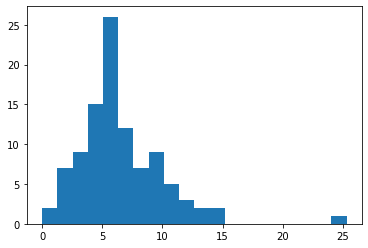

In [4]:
# Testing
plt.hist(original_data['Stochastic']['30'], bins=20)
plt.show()

MALP mean response times
25 --> 10.352666666666666 mins
30 --> 9.208499999999999 mins
35 --> 10.628 mins
40 --> 8.609666666666667 mins
45 --> 10.26033333333333 mins


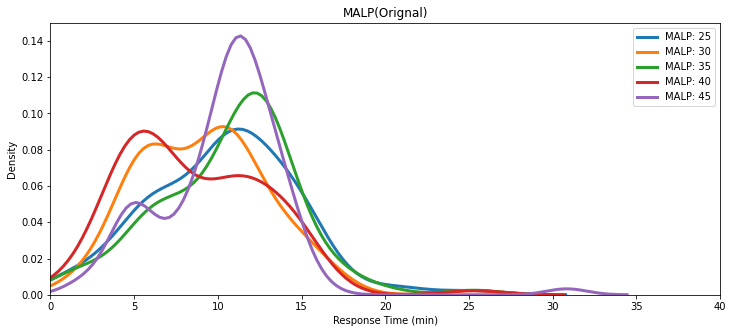

MEXCLP mean response times
25 --> 8.474 mins
30 --> 8.527666666666667 mins
35 --> 7.986333333333332 mins
40 --> 8.244833333333332 mins
45 --> 7.8536666666666655 mins


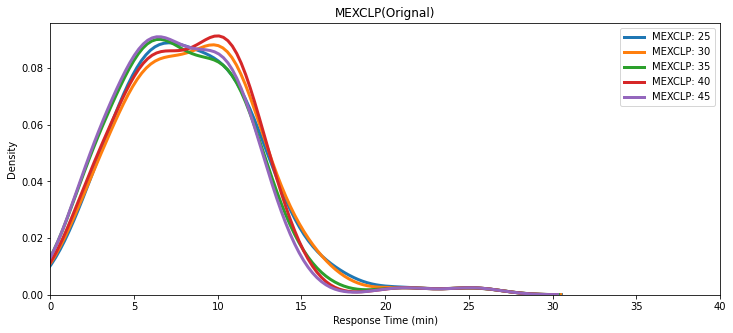

Robust00001 mean response times
25 --> 7.3340000000000005 mins
30 --> 7.177333333333333 mins
35 --> 7.060833333333332 mins
40 --> 6.675666666666668 mins
45 --> 6.3565 mins


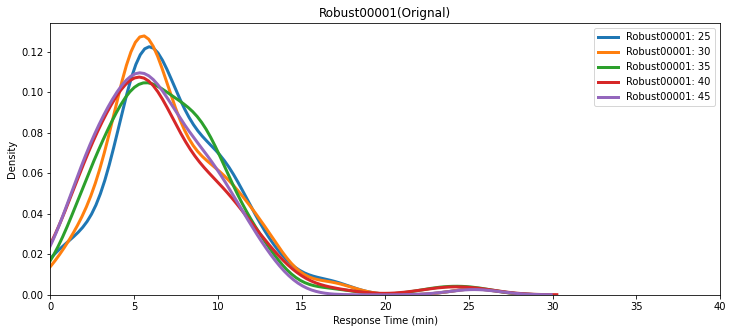

Robust0001 mean response times
25 --> 6.988833333333335 mins
30 --> 6.3963333333333345 mins
35 --> 6.0035 mins
40 --> 6.3020000000000005 mins
45 --> 6.959666666666668 mins


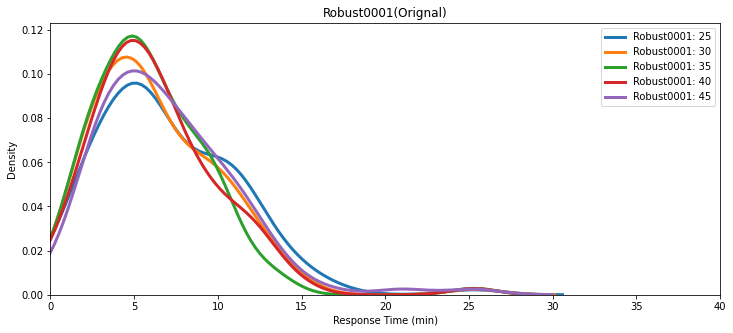

Robust001 mean response times
25 --> 7.635 mins
30 --> 6.6245 mins
35 --> 5.818333333333333 mins
40 --> 6.740666666666667 mins
45 --> 5.448 mins


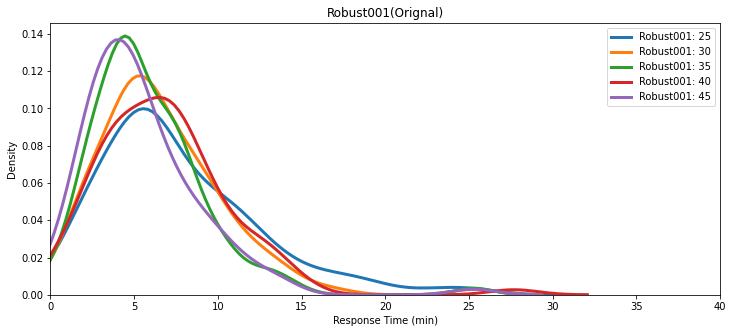

Robust005 mean response times
25 --> 7.560333333333333 mins
30 --> 7.208500000000002 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


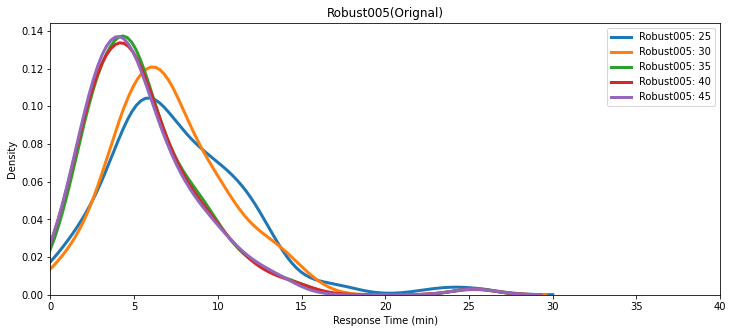

Robust01 mean response times
25 --> 7.213166666666667 mins
30 --> 6.0218333333333325 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


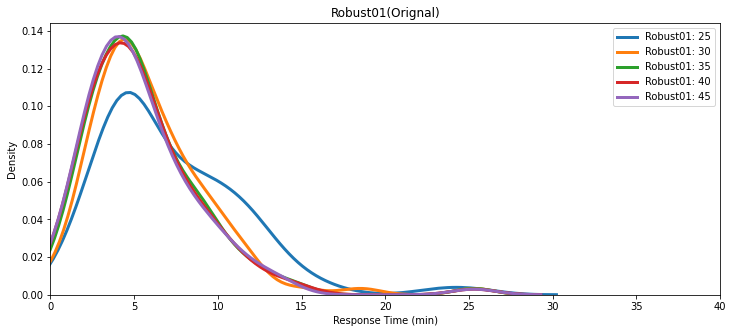

Stochastic mean response times
25 --> 7.505166666666665 mins
30 --> 6.510333333333333 mins
35 --> 5.808000000000001 mins
40 --> 5.386000000000001 mins
45 --> 5.151333333333334 mins


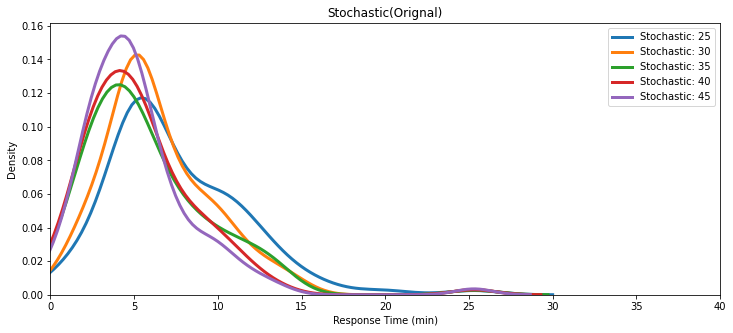

In [5]:
# Plot models with all ambulance settings

for model in sorted(original_data.keys()):        
    print(model, "mean response times")
    plt.figure(figsize=(12,5))
        
    for amb_setting in sorted(original_data[model].keys()):        
        bins = np.linspace(0, 30, 60)

        #plt.hist(original_data[model][amb_setting], bins, density=True, alpha=0.5, label= str(model + ': ' + amb_setting))
        
        sns.distplot(original_data[model][amb_setting], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label= str(model + ': ' + amb_setting))
        
        print(amb_setting, "-->", np.mean(original_data[model][amb_setting]), "mins")
        
    plt.legend(loc='upper right')
    plt.xlabel("Response Time (min)")
    plt.ylabel("Density")
    plt.title(model + "(Orignal)")
    plt.xlim([0, 40])
    plt.show()
    

Stochastic mean response times
35 --> 5.808000000000001 mins
40 --> 5.386000000000001 mins
45 --> 5.151333333333334 mins

Robust01 mean response times
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


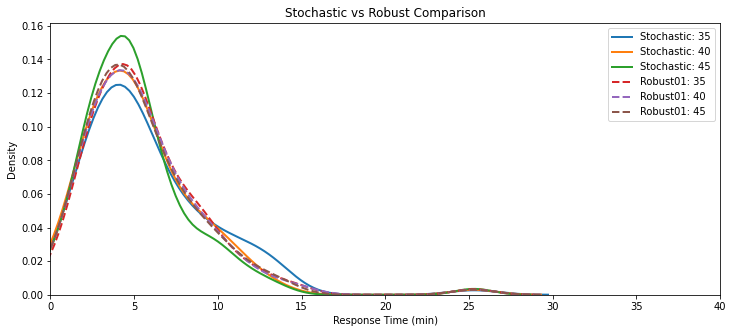

In [6]:
# Stochastic vs Robust combined

plt.figure(figsize=(12,5))

# Stochastic
model = 'Stochastic'
print(model, "mean response times")
for amb_setting in sorted(original_data[model].keys()):
    if(int(amb_setting) < 35):
        continue

    #plt.hist(original_data[model][amb_setting], bins, density=True, alpha=0.5, label= str(model + ': ' + amb_setting))

    sns.distplot(original_data[model][amb_setting], hist = False, kde = True,
             kde_kws = {'linewidth': 2},
             label= str(model + ': ' + amb_setting))

    print(amb_setting, "-->", np.mean(original_data[model][amb_setting]), "mins")
    
    
# Robust
model = 'Robust01'
print()
print(model, "mean response times")
for amb_setting in sorted(original_data[model].keys()):
    if(int(amb_setting) < 35):
        continue

    #plt.hist(original_data[model][amb_setting], bins, density=True, alpha=0.5, label= str(model + ': ' + amb_setting))

    sns.distplot(original_data[model][amb_setting], hist = False, kde = True,
             kde_kws = {'linewidth': 2, 'linestyle':'--'},
             label= str(model + ': ' + amb_setting))

    print(amb_setting, "-->", np.mean(original_data[model][amb_setting]), "mins")
    
    
plt.legend(loc='upper right')
plt.xlabel("Response Time (min)")
plt.ylabel("Density")
plt.title("Stochastic vs Robust Comparison")
plt.xlim([0, 40])
plt.show()
    

## New Response Times after Update

In [7]:
with open('inputs/response_times.json') as f:
    data = json.load(f)


In [8]:
print(data.keys())
#print(data["Stochastic"])

dict_keys(['Stochastic', 'MEXCLP', 'Robust001', 'Robust005', 'Robust01', 'MALP', 'Robust0001', 'Robust00001'])


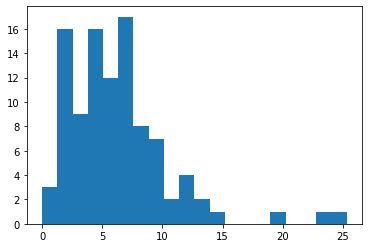

In [9]:
# Testing
plt.hist(data['Stochastic']['30'], bins=20)
plt.show()

MALP mean response times
25 --> 10.352666666666666 mins
30 --> 9.027833333333332 mins
35 --> 11.118166666666665 mins
40 --> 9.625499999999999 mins
45 --> 10.26033333333333 mins


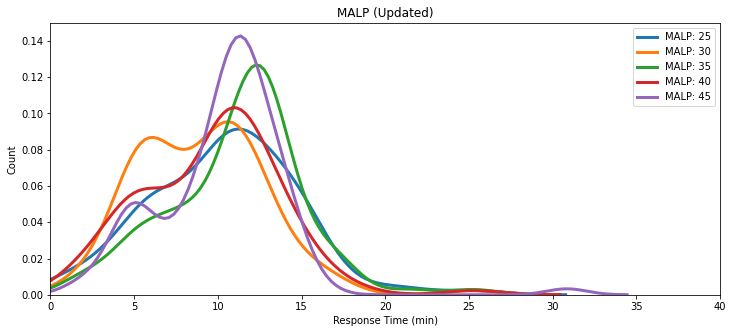

MEXCLP mean response times
25 --> 8.474 mins
30 --> 8.527666666666667 mins
35 --> 7.986333333333332 mins
40 --> 7.8536666666666655 mins
45 --> 7.751666666666665 mins


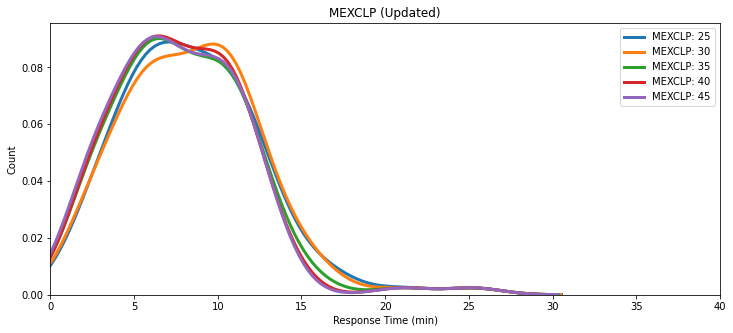

Robust00001 mean response times
25 --> 9.707333333333333 mins
30 --> 11.42 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


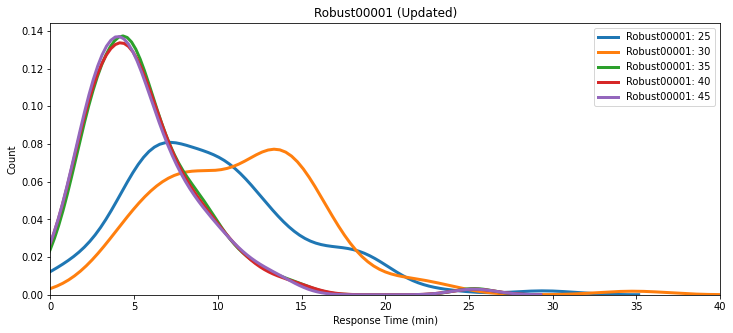

Robust0001 mean response times
25 --> 9.707333333333333 mins
30 --> 11.42 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


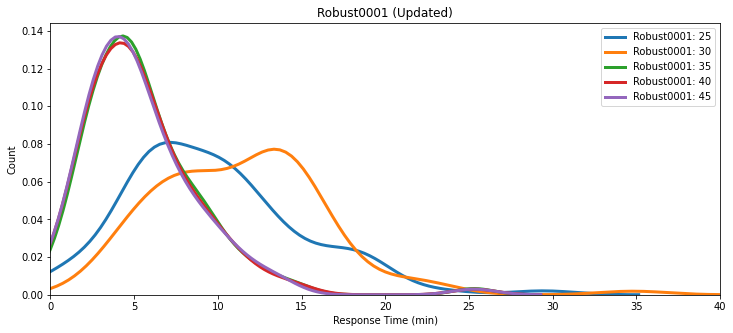

Robust001 mean response times
25 --> 9.707333333333333 mins
30 --> 11.42 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


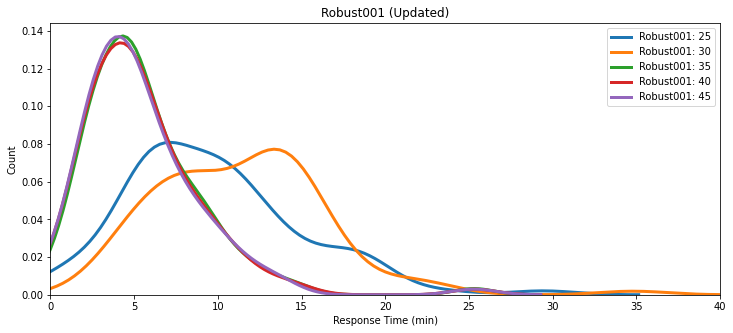

Robust005 mean response times
25 --> 9.707333333333333 mins
30 --> 11.42 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


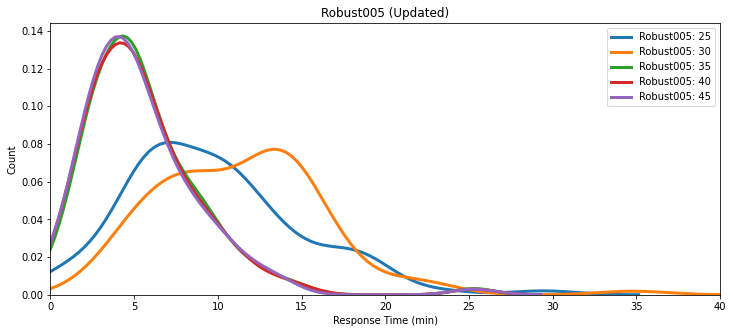

Robust01 mean response times
25 --> 9.707333333333333 mins
30 --> 11.42 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


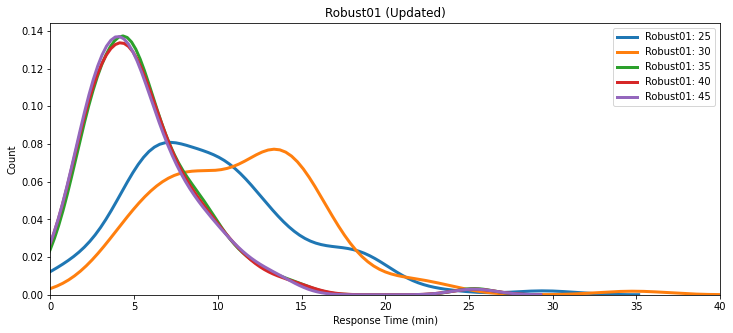

Stochastic mean response times
25 --> 6.8245 mins
30 --> 6.3125 mins
35 --> 6.161666666666667 mins
40 --> 5.612 mins
45 --> 5.440500000000001 mins


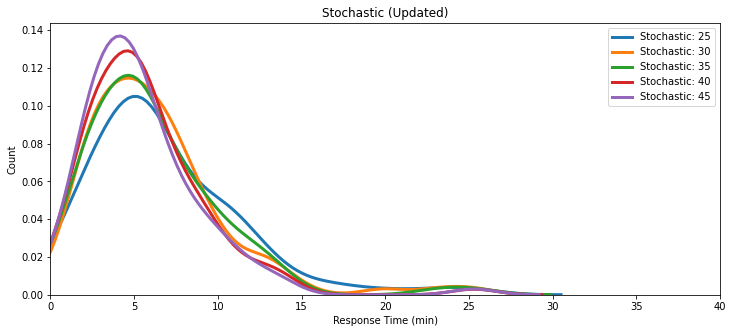

In [10]:
# Plot models with all ambulance settings

for model in sorted(data.keys()):
    print(model, "mean response times")
    plt.figure(figsize=(12,5))
    
    for amb_setting in sorted(data[model].keys()):
        bins = np.linspace(0, 30, 60)
        #plt.hist(data[model][amb_setting], bins, alpha=0.5, label= str(model + ': ' + amb_setting))
        
        sns.distplot(data[model][amb_setting], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label= str(model + ': ' + amb_setting))
        
        print(amb_setting, "-->", np.mean(data[model][amb_setting]), "mins")
        
    plt.legend(loc='upper right')
    plt.xlabel("Response Time (min)")
    plt.ylabel("Count")
    plt.title(model + " (Updated)")
    plt.xlim([0, 40])
    plt.show()
    

## Experiments and Testing

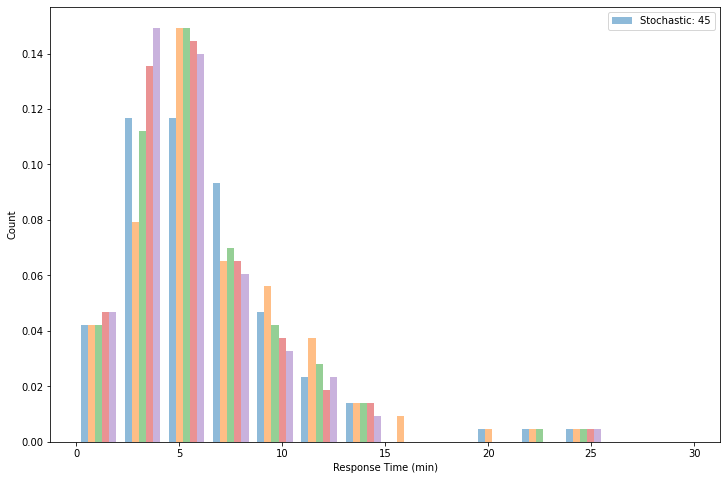

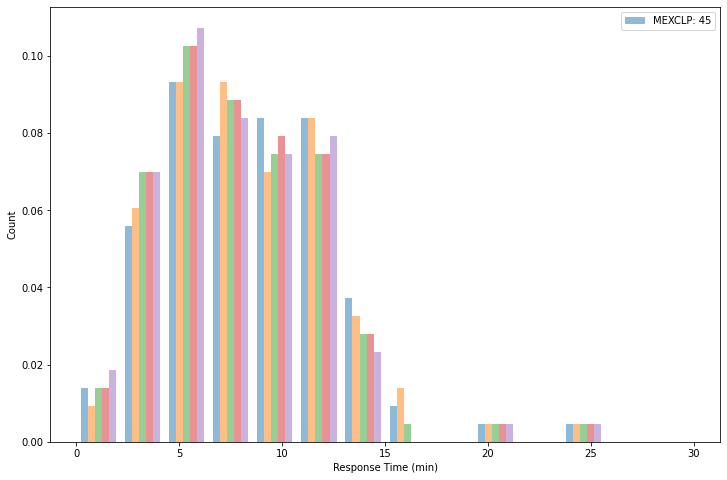

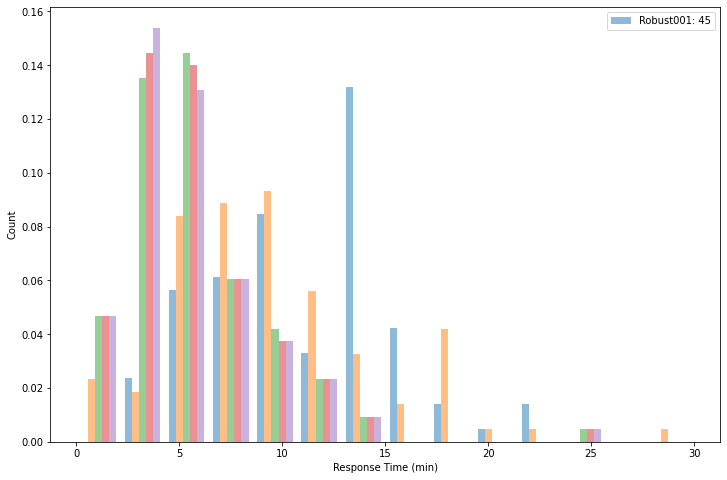

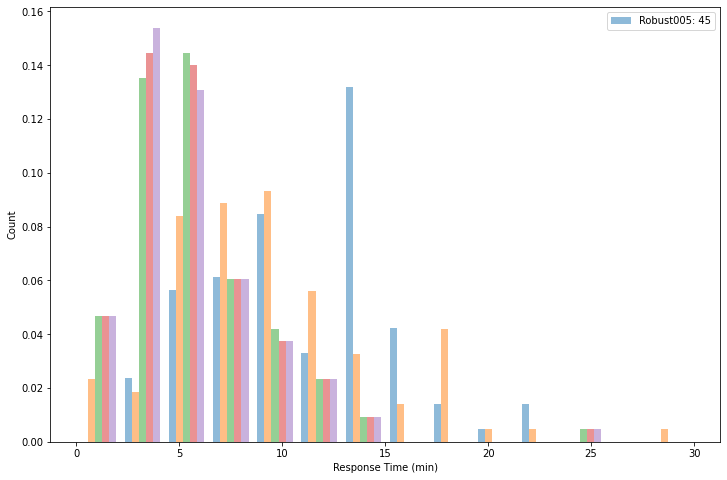

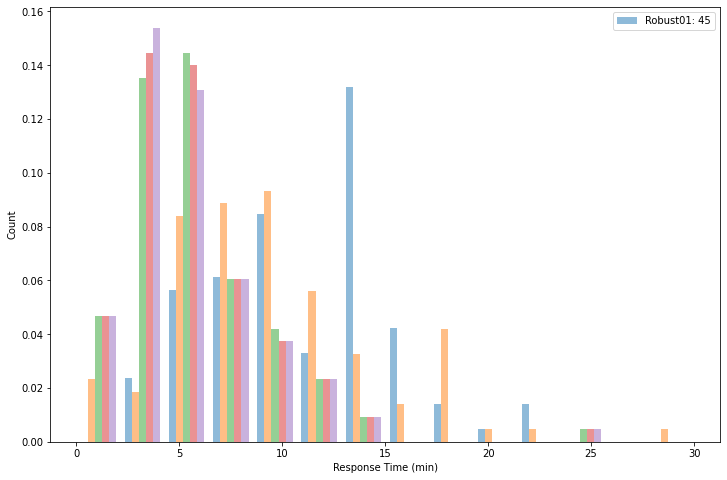

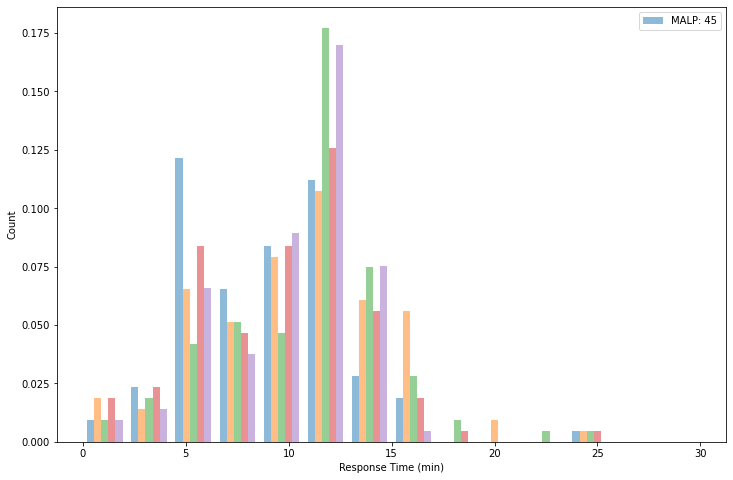

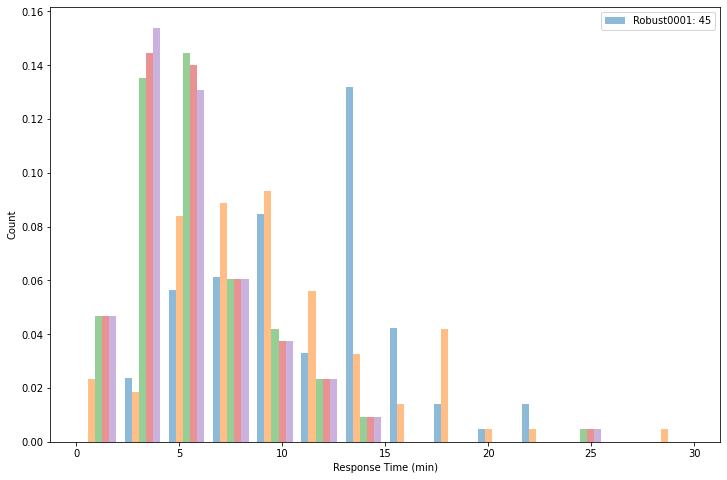

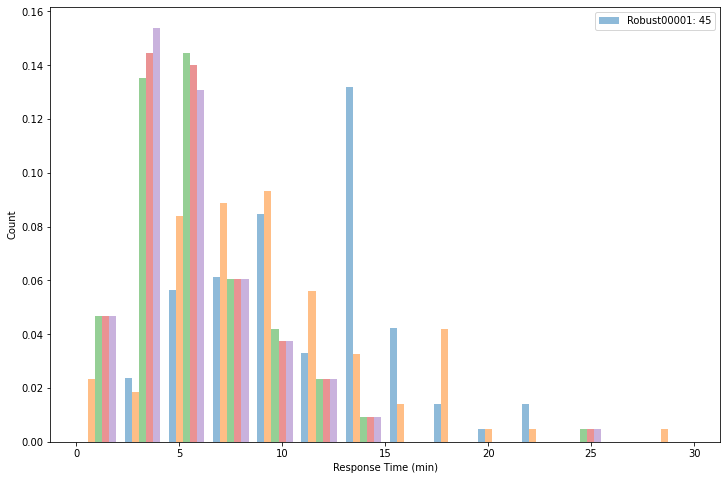

In [11]:
# Plot models with all ambulance settings using clustered bar histogram
fig = 0

for model in data.keys():
    plt.figure(figsize=(12,8))
    fig += 1
    
    model_data = []
    
    for amb_setting in data[model].keys():
        model_data.append(data[model][amb_setting])
    
    bins = np.linspace(0, 30, 15)
    plt.hist(model_data, bins, density=True, histtype='bar', alpha=0.5, label= str(model + ': ' + amb_setting))
        
    plt.legend(loc='upper right')
    plt.xlabel("Response Time (min)")
    plt.ylabel("Count")
    plt.show()
    

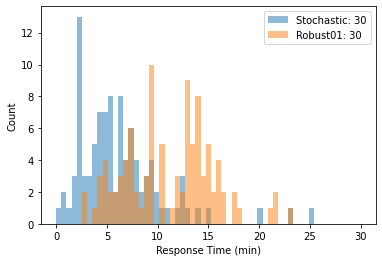

In [12]:
# Testing
# Robust not working?

for model in ['Stochastic', 'Robust01']:
    for amb_setting in ['30']:
        bins = np.linspace(0, 30, 60)

        plt.hist(data[model][amb_setting], bins, alpha=0.5, label= str(model + ': ' + amb_setting))
        
plt.legend(loc='upper right')
plt.xlabel("Response Time (min)")
plt.ylabel("Count")
plt.show()
    

In [13]:
print(np.mean(data['Stochastic']['30']))
print(np.mean(data['Robust01']['30']))

6.3125
11.42
